In [1]:
#同时输出一个cell多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all' 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris=pd.read_csv('d:/iris.csv')  #读入iris数据集，150个样本的5个特征 sepallength（花萼长度）petallength（花瓣长度），三个类别
#根据特征分为两部分，分别为预测特征target 和数据特征集 data
iris_data=iris.iloc[:,:4]
iris_target=iris['Species']
X=iris_data
y= iris_target

In [3]:
from sklearn.preprocessing import MinMaxScaler  #最大最小值规范化
X=MinMaxScaler().fit_transform(X)   #将data部分转换到0-1区间

# KMeans
<p><font size="3" color="red"> KMeans()参数：</br>
&nbsp;&nbsp;n_clusters：簇的数量，默认8</br>
&nbsp;&nbsp;n_init:使用不同的质心随机初始化的种子来运行KMeans算法的次数,默认10</br>
&nbsp;&nbsp;random_state : 每次质心随机初始化的随机数种子。默认None</br>
&nbsp;&nbsp;max_iter : 单次运行的KMeans算法的最大迭代次数，默认300

In [19]:
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3,n_init="auto",random_state=0)  #3个簇
kmeans_model.fit(X)  
labels = kmeans_model.labels_  #聚类的类别
print(labels)
kmeans_model.cluster_centers_  #质心
kmeans_model.inertia_  #簇内距离平方和
metrics.silhouette_score(X, labels, metric='euclidean') #轮廓系数
metrics.adjusted_rand_score(y, labels)  #调整rand系数ARI


C:\Users\Yjh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


array([[0.16442953, 0.19611111, 0.595     , 0.07830508],
       [0.84670531, 0.67171717, 0.4280303 , 0.78582435],
       [0.52720518, 0.44543651, 0.3125    , 0.56476998]])

7.844609656379599

0.4891162115247112

0.8859501978730681

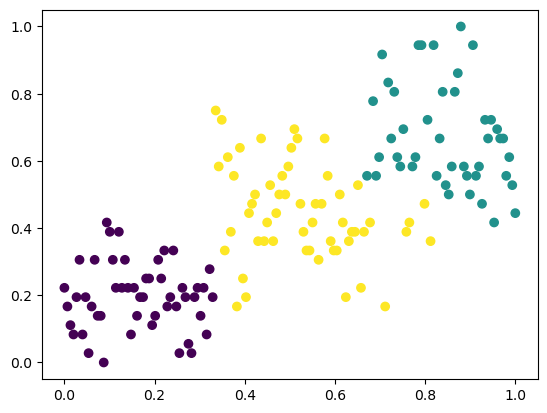

In [20]:
#2维散点图，第0列、1列，不同颜色代表簇
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [6]:
cluster_counts=pd.Series(labels).value_counts()  #每一个簇的样本数量
centers=pd.DataFrame(kmeans_model.cluster_centers_)  #质心
cluster=pd.concat([centers,cluster_counts],axis=1)
cluster.columns=list(iris_data.columns)+[u'数量'] #每个簇的质心+簇内数量
print(cluster)



   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  数量
0    0.527205      0.445437      0.31250      0.564770  56
1    0.164430      0.196111      0.59500      0.078305  50
2    0.846705      0.671717      0.42803      0.785824  44


In [7]:
#输出原始数据及聚类编号到csv文件
data_new=pd.concat([pd.DataFrame(iris),pd.Series(labels)],axis=1) #原始数据+类编号
data_new.columns=list(iris.columns)+[u'聚类编号']   #列名
data_new.to_csv("a.csv",encoding="gb2312")#写入文件


# 层次聚类

<p><font size="3" color="red"> AgglomerativeClustering()参数： <br/>
 &nbsp;&nbsp;-n_clusters：聚类的个数,默认2 <br/>
 &nbsp;&nbsp;-affinity：计算距离的方法默认欧式距离'euclidean',也可定义曼哈顿距离‘manhattan’，或者余弦距离 “cosine” <br/>
 &nbsp;&nbsp;-linkage：指定层次聚类判断相似度的方法，默认ward，有以下四种： <br/>
 &nbsp;&nbsp; &nbsp;&nbsp; ward：所有聚类中的平方差和最小<br/>
    &nbsp;&nbsp; &nbsp;&nbsp;single：组间距离等于两类对象之间的最小距离。（即single-linkage） <br/>
  &nbsp;&nbsp; &nbsp;&nbsp;average：组间距离等于两组对象之间的平均距离。（average-linkage） <br/>
  &nbsp;&nbsp; &nbsp;&nbsp;complete：组间距离等于两组对象之间的最大距离。（complete-linkage） <br/></p>


In [8]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)  #层次聚类
clustering.fit(X)
clustering.labels_   #聚类编号

AgglomerativeClustering(n_clusters=3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
metrics.silhouette_score(X, clustering.labels_, metric='euclidean') #轮廓系数
metrics.adjusted_rand_score(y, clustering.labels_)  #调整rand系数ARI

0.48220959401837227

0.97993200471804

<Figure size 2000x600 with 0 Axes>

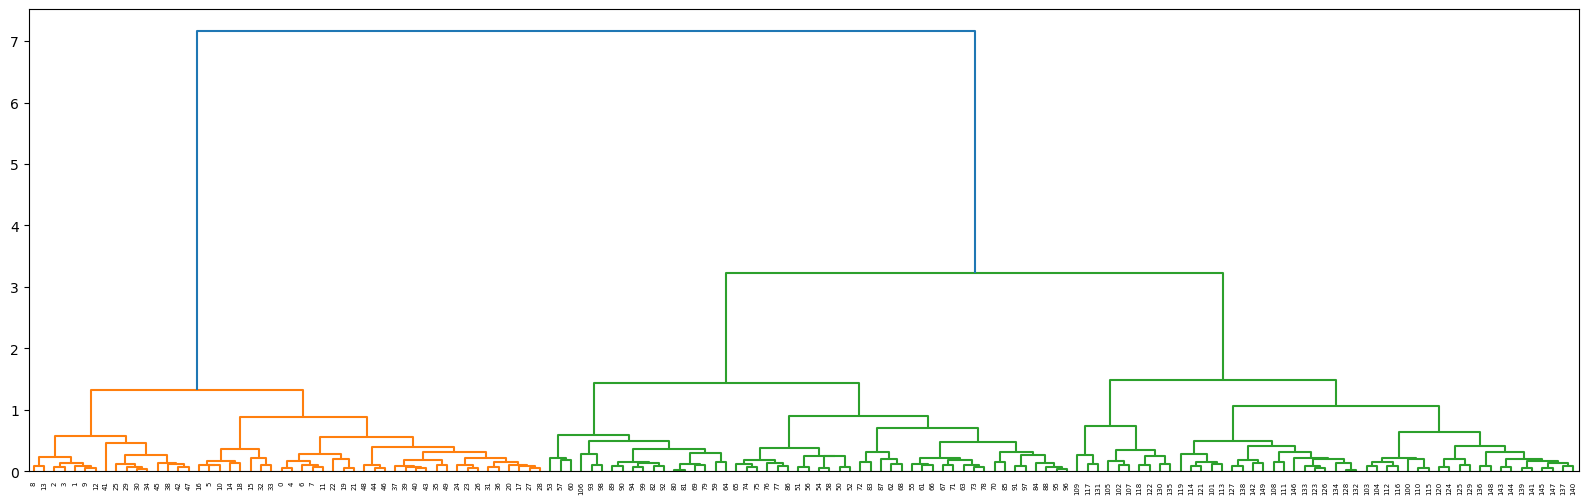

In [10]:
#层次聚类展示
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20,6))
Z = linkage(X, method='ward', metric='euclidean')
p = dendrogram(Z)
plt.show()

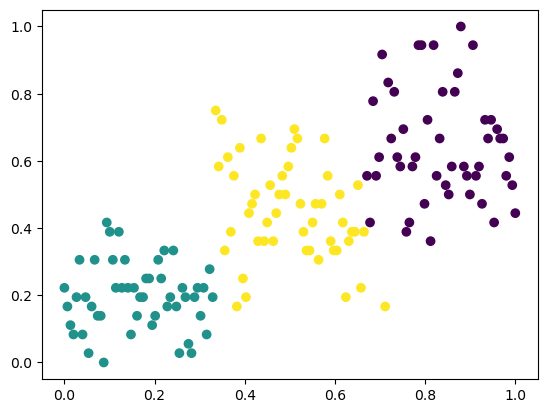

In [11]:
#2维散点图，第0列、1列，不同颜色代表簇
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

# DBSCAN

<p><font size="3" color="red">DBSCAN()参数：<br/>
    &nbsp;&nbsp; eps： ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内。默认值是0.5. <br/>
 &nbsp;&nbsp;min_samples：样本点要成为核心对象所需要的ϵ-邻域的样本数阈值。默认值是5 <br/>
 &nbsp;&nbsp;metric：最近邻距离度量参数，默认欧式距离 <br/></p>

In [26]:
from  sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=9)
dbscan.fit(X) 
label_pred = dbscan.labels_  #噪声点为-1
label_pred

DBSCAN(eps=0.2, min_samples=9)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [24]:
metrics.silhouette_score(X, label_pred, metric='euclidean') #轮廓系数
metrics.adjusted_rand_score(y, label_pred)  #调整rand系数ARI

0.4483830859323663

0.5233314138625167

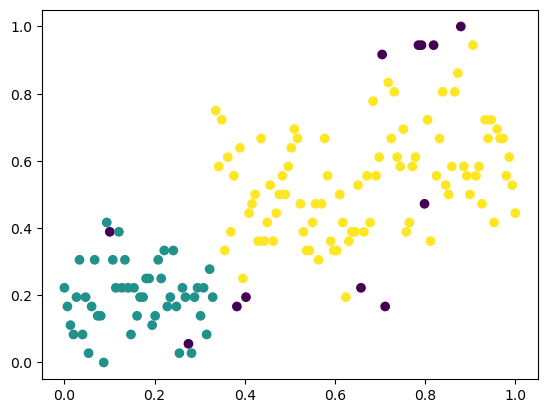

In [23]:
#2维散点图，第0列、1列，不同颜色代表簇
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()